### Modeling DAQUAR
* [Dataset](https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/vision-and-language/visual-turing-challenge)

* [Original Paper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://proceedings.neurips.cc/paper_files/paper/2014/file/d516b13671a4179d9b7b458a6ebdeb92-Paper.pdf)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import process_labels, split_data
from src.classifiers_base import preprocess_df

from transformers import BertTokenizer

from src.multimodal_data_loader import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_base import train_early_fusion, train_late_fusion

In [2]:
PATH = 'datasets/daquar/'

In [3]:
text_path = os.path.join(PATH, 'labels.csv')
images_path = os.path.join(PATH, 'images')

## Get data

In [4]:
df = pd.read_csv(text_path)
df

,question,image_id,answer,split
0,what is on the right side of the black telepho...,image3,desk,train
1,what is in front of the white door on the left...,image3,telephone,train
2,what is on the desk in the image3 ?,image3,"book, scissor, papers, tape_dispenser",train
3,what is the largest brown objects in this imag...,image3,carton,train
4,what color is the chair in front of the white ...,image3,red,train
...,...,...,...,...
12463,what is found below the chandelier in the imag...,image1448,table,test
12464,what is on the floor in the image1449 ?,image1449,rug,test
12465,what are around dining table in the image1449 ?,image1449,chair,test
12466,what is at the opposite side of the dining tab...,image1449,decoration_item,test


## Data Perparation

In [5]:
# Select features and labels vectors
text_columns = 'question'
image_columns = 'image_id'
label_columns = 'answer'

df = preprocess_df(df, image_columns, images_path)

# Split the data
train_df, test_df = split_data(df)

# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

Train Shape: (6795, 4)
Test Shape: (5673, 4)


In [6]:
train_df

,question,image_id,answer,split
0,what is on the right side of the black telepho...,datasets/daquar/images/image3.png,desk,train
1,what is in front of the white door on the left...,datasets/daquar/images/image3.png,telephone,train
2,what is on the desk in the image3 ?,datasets/daquar/images/image3.png,"book, scissor, papers, tape_dispenser",train
3,what is the largest brown objects in this imag...,datasets/daquar/images/image3.png,carton,train
4,what color is the chair in front of the white ...,datasets/daquar/images/image3.png,red,train
...,...,...,...,...
6790,what are stuck on the wall in the image1440 ?,datasets/daquar/images/image1440.png,photo,train
6791,what is in the top right corner in the image14...,datasets/daquar/images/image1440.png,window,train
6792,what is in front of the window in the image1440 ?,datasets/daquar/images/image1440.png,cabinet,train
6793,what are the things on the cabinet in the imag...,datasets/daquar/images/image1440.png,"candelabra, book",train


In [7]:
# Instantiate tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [8]:
train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Models

In [9]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
The number of parameters of the model are: 196132595
Epoch 1/15 - Test Accuracy: 0.0294
Epoch 2/15 - Test Accuracy: 0.0497
Epoch 3/15 - Test Accuracy: 0.0490
Epoch 4/15 - Test Accuracy: 0.0356
Epoch 5/15 - Test Accuracy: 0.0363
Epoch 6/15 - Test Accuracy: 0.0224
Epoch 7/15 - Test Accuracy: 0.0409
Epoch 8/15 - Test Accuracy: 0.0293
Epoch 9/15 - Test Accuracy: 0.0497
Epoch 10/15 - Test Accuracy: 0.0469
Epoch 11/15 - Test Accuracy: 0.0351
Epoch 12/15 - Test Accuracy: 0.0204
Epoch 13/15 - Test Accuracy: 0.0446
Epoch 14/15 - Test Accuracy: 0.0423
Epoch 15/15 - Test Accuracy: 0.0446


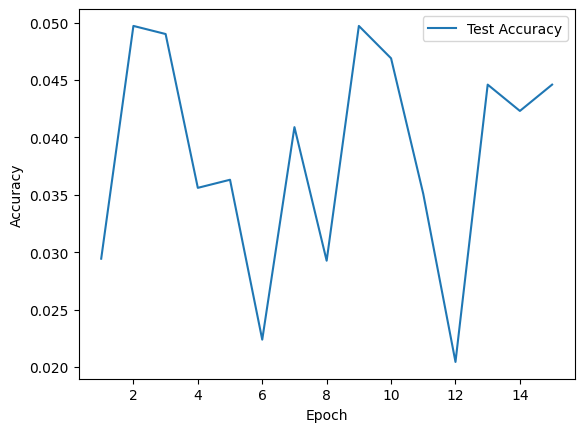

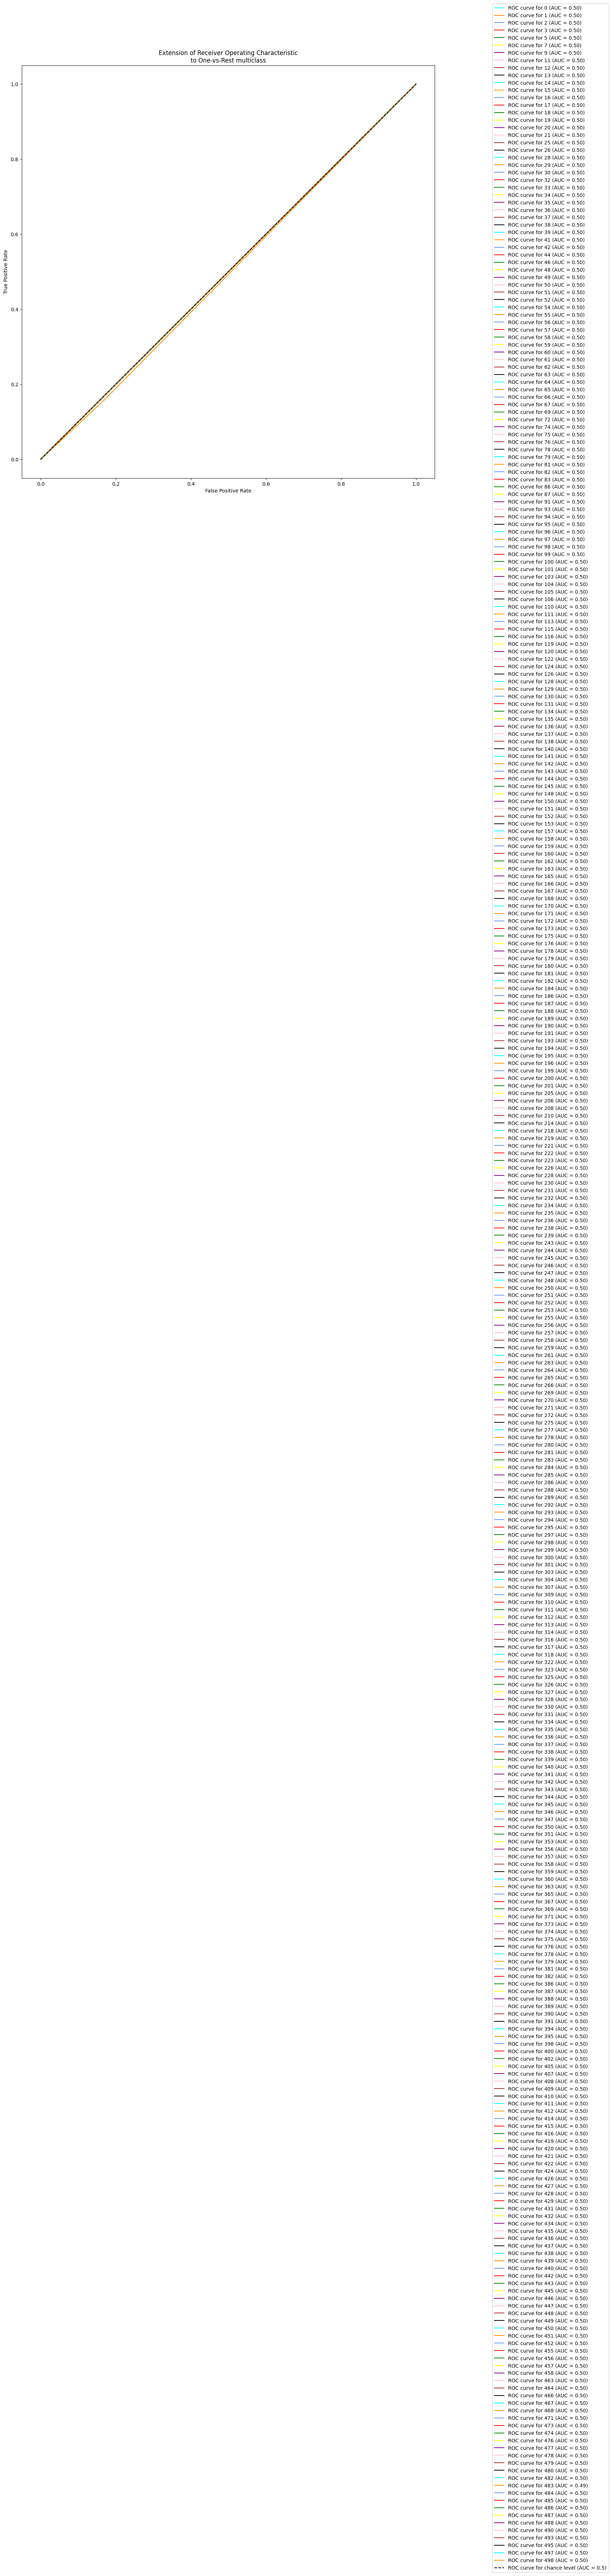

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.05      0.83      0.09       282
          11       0.00      0.00      0.00       143
          12       0.00      0.00      0.00        94
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00    

In [10]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
The number of parameters of the model are: 196034291
Epoch 1/15 - Test Accuracy: 0.0353
Epoch 2/15 - Test Accuracy: 0.0497
Epoch 3/15 - Test Accuracy: 0.0129
Epoch 4/15 - Test Accuracy: 0.0294
Epoch 5/15 - Test Accuracy: 0.0178
Epoch 6/15 - Test Accuracy: 0.0294
Epoch 7/15 - Test Accuracy: 0.0497
Epoch 8/15 - Test Accuracy: 0.0497
Epoch 9/15 - Test Accuracy: 0.0497
Epoch 10/15 - Test Accuracy: 0.0353
Epoch 11/15 - Test Accuracy: 0.0497
Epoch 12/15 - Test Accuracy: 0.0353
Epoch 13/15 - Test Accuracy: 0.0497
Epoch 14/15 - Test Accuracy: 0.0497
Epoch 15/15 - Test Accuracy: 0.0497


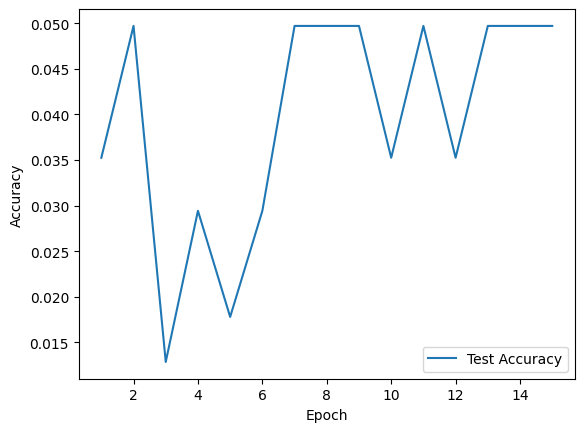

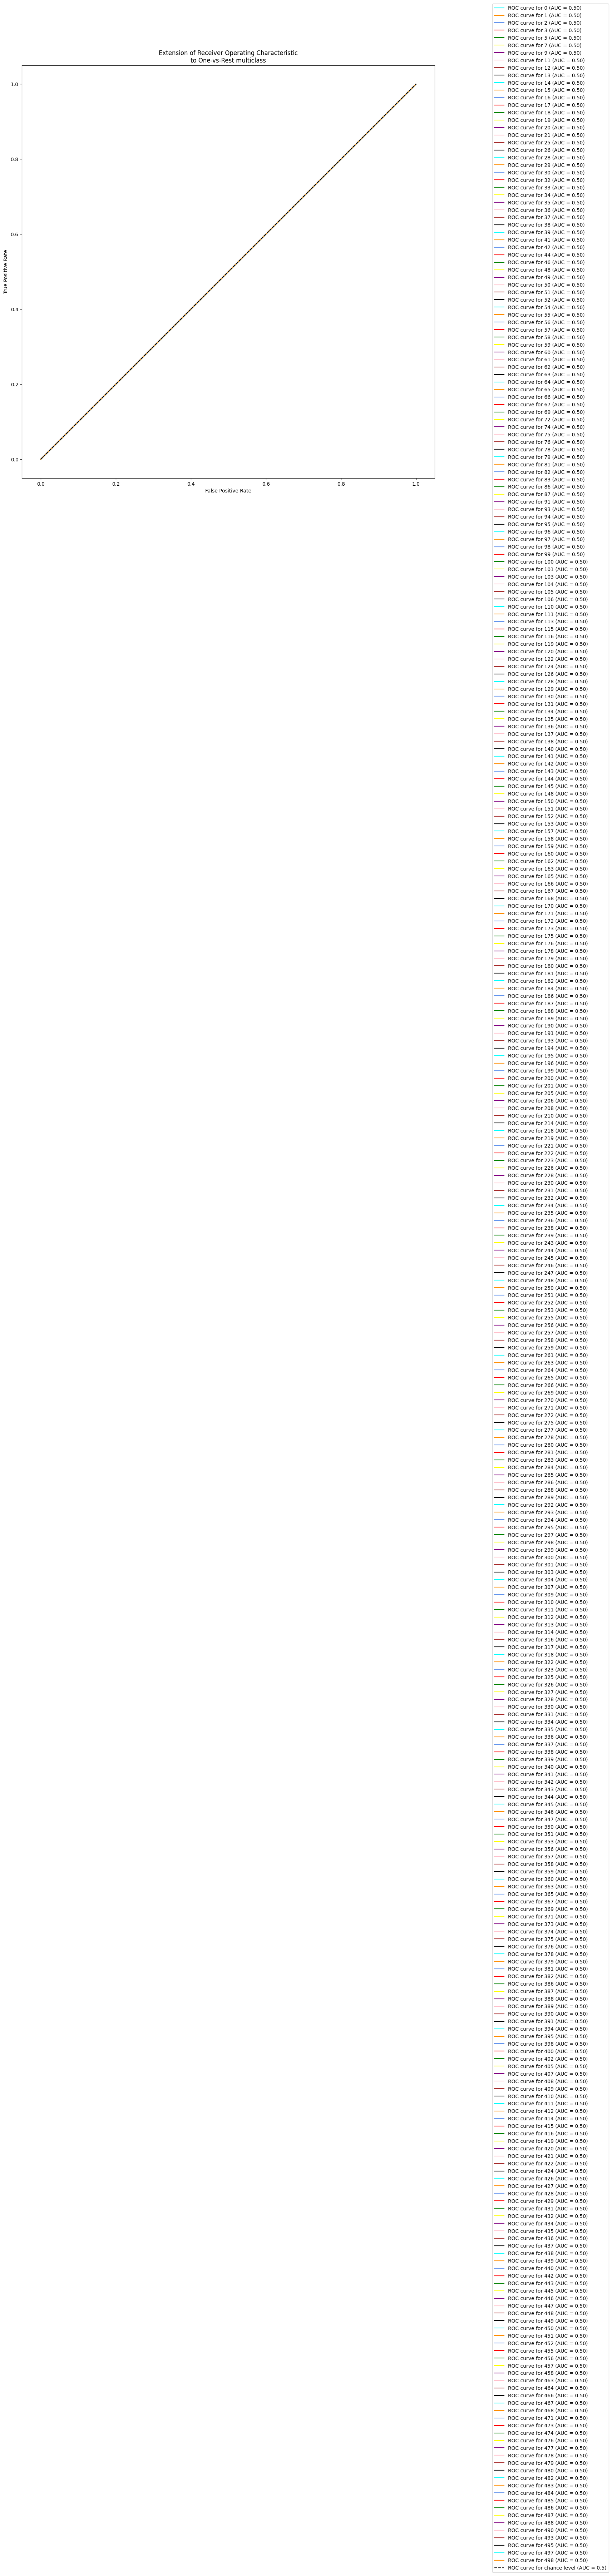

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.05      1.00      0.09       282
          11       0.00      0.00      0.00       143
          12       0.00      0.00      0.00        94
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00    

In [11]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)

In [12]:
#from src.classifiers_base import TextModel, VisionModel, EarlyFusionModel, LateFusionModel
#text_model = TextModel()
#image_model = VisionModel()
#model = EarlyFusionModel(text_model=text_model, image_model=image_model, output_size=output_size)